# Lección 3. Regresión Lineal Múltiple

Ejecuta la primera celda de código para visualizar la presentación en Genially.

In [3]:
import IPython
IPython.display.IFrame('https://view.genial.ly/62bb63a94561e10010ba0810',900,500)

# Bibliotecas

Recuerda, una biblioteca es un conjunto de funciones predefinidas que podemos usar en nuestros programas. En esta lección vamos a usar inicialmente las bibliotecas NumPy y Matplotlib. Posteriormente, haremos uso de Scikit-Learn. 

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays.
Con Numpy crearemos matrices y realizaremos algunas operaciones con ellas. 

In [5]:
# Importamos las bibliotecas numpy y matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Datos

En la lección haremos uso de una pequeña muestra de datos ya introducida en la presentación interactiva. 
Los datos de partida son las notas de matemáticas y física en 2º de Bachillerato y la nota media obtenida en la Prueba de Acceso a la Universidad (PAU) de 12 alumnos. 
* Nota de matemáticas: x=[2,3,4,4,5,6,6,7,7,8,10,10] 
* Nota de física: y= [1,3,2,4,4,4,6,4,6,7,9,10]
* PAU: z=[1,2,3,4,5,5,7,6,6,8,7,9]
 

In [13]:
# Asignamos los datos a las variables
x = [2,3,4,4,5,6,6,7,7,8,10,10]
y = [1,3,2,4,4,4,6,4,6,7,9,10]
z = [1,2,3,4,5,5,7,6,6,8,7,9]

# Nube de puntos

En este caso tenemos 3 variables, así que podemos intentar visualizar los datos en 3 dimensiones a través de la función "scatter" de matplotlib. 

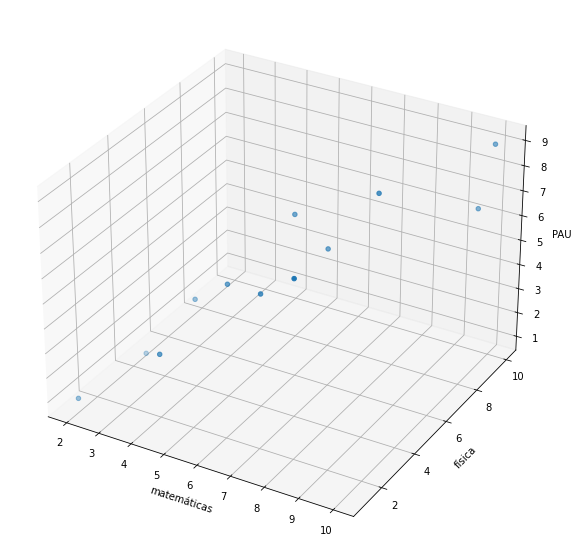

In [12]:
# Creamos la figura de tamaño 10x10
fig = plt.figure(figsize=(10, 10))

# "Convertimos" la gráfica en 3D
grafica3d = fig.add_subplot(projection='3d')

# Nombramos los ejes
grafica3d.set_xlabel('matemáticas')
grafica3d.set_ylabel('física')
grafica3d.set_zlabel('PAU')

# Volcamos los datos situados en las variables vectoriales x, y, z
grafica3d.scatter(x, y, z)
plt.show()


Podemos comprobar que resulta complicado ver relación en 3 dimensiones, así que imagina problemas reales donde se puede trabajar con cientos o incluso mayor número de variables. Gracias a las matemáticas y al cómputo por ordenador, podemos procesar grandes cantidades de datos en múltiples dimensiones de forma eficiente.

Nuestro objetivo es crear un modelo que relacione las notas de matemáticas y físicas con la nota correspondiente en PAU. Los datos de partida son los que alimentarán el modelo.

Una vez creado el modelo, los datos observables serán las notas de física y matemáticas y la variable "objetivo" es la nota en PAU. A través de nuevas observaciones (las notas de un alumno en matemáticas y física) más el uso del modelo creado, vamos a inferir que nota tendrá en la prueba de acceso a la universidad.  

# Matrices

El uso de matrices nos va a permitir representar y procesar los datos multidimensionales que disponemos para crear nuestro modelo de aprendizaje automático, en este caso, regresión lineal.  

Recuerda que una matriz es una tabla numérica rectangular, formada por filas y columnas. Por ejemplo, una matriz de 2x2

\begin{equation} 
\begin{bmatrix} 
1 & 2\\
3 & 4
\end{bmatrix}
\end{equation}  


Gracias a Python y a la biblioteca NumPy, podemos operar muy fácil con matrices. Con la función de numpy.array creamos las matrices con la siguiente sintaxis:
A = np.array ( [fila1, fila2, fila3, ...] ) Siendo cada fila y vector numérico entre corchetes.

In [40]:
# Creación de matriz con Numpy y asignación a variable A
A = np.array([[1,2], [3,4]])
B = np.array ([[2,3], [3,1]])

# Si recorremos en un bucle for vemos que, efectivamente, A es un vector de vectores.
linea = 1
for a in A:
    print("Línea", linea, a) 
    linea= linea + 1

Línea 1 [1 2]
Línea 2 [3 4]


In [41]:
# Podemos acceder a la fila de una matriz mediante su índice, comenzando por 0.
# Accedemos a la primera fila de la matriz A [1,2]
print(A[0])

[1 2]


In [42]:
# También podemos acceder elemento a elemento proporcionando el número de fila y el número de columna
# Accedemos al elemento de la primera fila, segunda columna, de la matriz A
print(A[0][1])

2


Podemos crear programas en Python para operar con matrices de la misma manera en la que operamos sobre el papel. Por ejemplo, para efectuar la suma A+B, recorremos manualmente elemento a elemento para sumar ambas matrices.

In [49]:
# Vamos a sumar los elementos de matrices cuadradas de 2x2
filas=2
columnas=2

# Recorremos las matrices mediante los índices [i][j]
for i in range(filas):
    for j in range(columnas):
        
        # Sumamos y mostramos el resultado
        print(A[i][j]+B[i][j])

3
5
6
5


# Operaciones con matrices

El código anterior sirve como ejemplo de recorrido de una matriz mediante el uso de bucles "for" en Python. Operar con matrices es mucho más fácil gracias a las funciones predefinidas de Python y a la librería Numpy.

* Para sumar y restar podemos usar los operadores + -
* Usamos el símbolo @ como operando de multiplicación
* Con el símbolo A.T nos referimos a la traspuesta de A.
* Con la función numpy.linalg.inv(A) obtenemos la inversa de A.

In [6]:
A=np.array([[1, 1], [2, 3]])
B=np.array([[1, 2], [2, 2]])
print("Matriz A: \n", A, "\n")
print("Matriz B: \n", B, "\n")


#Multiplicar matrices
print("Multiplicación de A y B")
mul = A @ B
print(mul, "\n")

#Traspuesta de una matriz
print("Matriz traspuesta de mul: \n", mul.T, "\n")

#Inversa de una matriz
invA = np.linalg.inv(A)
print("Inversa de A: \n", invA)

Matriz A: 
 [[1 1]
 [2 3]] 

Matriz B: 
 [[1 2]
 [2 2]] 

Multiplicación de A y B
[[ 3  4]
 [ 8 10]] 

Matriz traspuesta de mul: 
 [[ 3  8]
 [ 4 10]] 

Inversa de A: 
 [[ 3. -1.]
 [-2.  1.]]


# Representación de datos

Vamos a cambiar la notación para referirnos a nuestros datos, recuerda que disponemos de:
* Nota de matemáticas: x = [2,3,4,4,5,6,6,7,7,8,10,10] 
* Nota de física: y = [1,3,2,4,4,4,6,4,6,7,9,10]
* PAU: z = [1,2,3,4,5,5,7,6,6,8,7,9]

Las variables de partida, notas de matemáticas y físicas, serán almacenadas en una matriz, de manera de que cada columna corresponde a una característica (asignatura) y cada fila corresponde a un alumno. 

Tenemos 12 alumnos y 2 asignaturas. De esta manera, los datos serán almacenados en la variable X, matriz de 12x2.
$ \begin{equation} X = 
\begin{bmatrix} 
2 & 1 \\
3 & 3 \\
4 & 2 \\
4 & 4 \\
5 & 4 \\
6 & 4 \\
6 & 6 \\
7 & 4 \\
7 & 6 \\
8 & 7 \\
10 & 9 \\
10 & 10 \\
\end{bmatrix}
\end{equation}  $

La variable 'y' será un vector que almacenará la variable objetivo, en este caso, nota de PAU. 
$ \begin{equation} y = [1,2,3,4,5,5,7,6,6,8,7,9] \end{equation}  $

In [34]:
# Asignamos los datos a las variables

# Matriz X
X=np.array([ [2,1], [3,3], [4,2], [4,4], [5,4], [6,4], [6,6], [7,4], [7,6], [8,7], [10,9], [10,10] ])
print("Notas de matemáticas y física de 12 alumnos: matriz X \n", X)


# Vector y
y=np.array([1,2,3,4,5,5,7,6,6,8,7,9])
print("\n Nota obtenida en PAU: y =", y)

Notas de matemáticas y física de 12 alumnos: matriz X 
 [[ 2  1]
 [ 3  3]
 [ 4  2]
 [ 4  4]
 [ 5  4]
 [ 6  4]
 [ 6  6]
 [ 7  4]
 [ 7  6]
 [ 8  7]
 [10  9]
 [10 10]]

 Nota obtenida en PAU: y = [1 2 3 4 5 5 7 6 6 8 7 9]


# Regresión Lineal Múltiple

Recordemos que en problemas de regresión lineal simple disponemos de una distribución bidimensional y tratamos de encontrar la recta de regresión que mejor se ajusta a los datos. La ecuación de la recta es $𝑦=𝐴+𝐵𝑥$ siendo:

+ A Término independiente
+ B Pendiente
+ x variable independiente
+ y variable dependiente

El entrenamiento del modelo consistía en encontrar los parámetros A y B que mejor se ajustaran a los datos.

Para este problema, vamos a cambiar la notación ligeramente:
+ A será $w_0$
+ B será $w_1$ 

De esta manera, la recta es $y = w_0 + w_1 x$. El modelo puede extenderse a más variables, siendo en este caso nota de matemáticas $x_1$ y física $x_2$.

$y = w_0 + w_1 x_1 + w_2 x_2$.

La ecuación anterior puede verse como una multiplicación de un vector fila 'x' y un vector columna 'w'. El coeficiente $w_0$ puede entenderse que es multiplicado por '1', así que añadimos una columna al vector 'x'.
\begin{equation} y = 
\begin{bmatrix} 
1 & x_1 & x_2 
\end{bmatrix} 
\begin{bmatrix} 
w_0 \\ w_1 \\ w_2 
\end{bmatrix} = w_0 + w_1 x_1 + w_2 x_2
\end{equation}  


Generalizando para 'k' variables (características) $y = w_0 + w_1 x_1 + w_2 x_2 + ... +  w_k x_k$


Podemos usar la notación matricial para representar todos los datos. Teniendo k características y n observaciones (individuos), obtenemos las siguientes matrices:
+ Matriz 'X' de características de n filas y k+1 columnas
+ Vector columna 'y' variable objetivo
+ Vector columna 'w' de coeficientes
 
$ \begin{equation} X = 
\begin{bmatrix} 
1 & x_{11} & x_{12} & ... & x_{1k} \\
1 & x_{21} & x_{22} & ... & x_{2k}\\
1 & x_{31} & x_{32} & ... & x_{3k}\\
1 & ... & ... & ... & ... \\
1 & x_{n1} & x_{n2} & ... & x_{nk}
\end{bmatrix}
\end{equation}  $


 $ \begin{equation} y = 
\begin{bmatrix} 
y_1 \\
y_2 \\
y_3 \\
... \\
y_n
\end{bmatrix}
\end{equation}  $

$ \begin{equation} w = 
\begin{bmatrix} 
w_0 \\
w_1 \\
w_2 \\
... \\
w_k
\end{bmatrix}
\end{equation}  $

De modo matricial, la ecuación queda representada de la siguiente manera $y=X w$. Como has podido observar, a la matriz X se le añade una columna de '1' para ajustar la multiplicación con el coeficiente $w_0$ 

Para crear nuestro modelo partimos de los datos:
+ Matriz X, donde cada columna corresponde con una característica (nota de matemáticas y nota de física) y cada fila a un alumno. Además, hay que añadir una columna de '1' al principio. 
+ El vector y, variable objetivo, nota PAU. 

In [35]:
# Ya disponemos en X los datos de una celda anterior, vamos a añadir una columna de '1'

# Con la función de Numpy.ones(filas, columnas) creamos una matriz de unos.
M1 = np.ones((12,1))

# Con la función Numpy.append añadimos la matriz creada a nuestros datos.
X = np.append(M1, X, 1)
print(X)

[[ 1.  2.  1.]
 [ 1.  3.  3.]
 [ 1.  4.  2.]
 [ 1.  4.  4.]
 [ 1.  5.  4.]
 [ 1.  6.  4.]
 [ 1.  6.  6.]
 [ 1.  7.  4.]
 [ 1.  7.  6.]
 [ 1.  8.  7.]
 [ 1. 10.  9.]
 [ 1. 10. 10.]]


# Regresión Lineal y MSE

Nuestro problema consiste en encontrar el vector de coeficientes $w$ que mejor se ajusta a los datos. Una de las funciones de coste básicas en aprendizaje automático es MSE (mean squared error o error cuadrático medio), como la media de los errores al cuadrado entre el valor de 'y' real y el valor predicho. $ MSE = \frac {1} {n} \sum ({y_i - y_i^{\prime}})^2 $ 

Mediante fundamentos matemáticos superiores a esta lección, se calcula la ecuación que obtiene el vector de coeficientes que  minimiza el error cuadrático medio: $w=(X^{T}X)^{-1}X^{T}y$ 

In [11]:
# Vamos a realizar el cálculo de w paso a paso para visualizar las matrices intermedias resultantes 
# Usaremos X' como notación de traspuesta de X

# Calculamos X'X. X' tiene un tamaño de 3x12 y X de 12x3, el resultado será una matriz de 3x3
Ra = X.T @ X
print(Ra)

[[ 12.  72.  60.]
 [ 72. 504. 431.]
 [ 60. 431. 380.]]


In [12]:
# Intevertimos Ra para calcular la inversa de (X'X). Hacemos uso de la función de Numpy linalg.inv(matriz)
Ra_invertida = np.linalg.inv(Ra)
print(Ra_invertida)

[[ 0.66747798 -0.17385257  0.09179416]
 [-0.17385257  0.11126565 -0.09874826]
 [ 0.09179416 -0.09874826  0.10013908]]


In [13]:
# Multiplicamos Ra_invertida por X'.
# Ra_invertida es 3x3, X' es 3x12, resultado es 3x12
Rb = Ra_invertida @ X.T
print(Rb)

[[ 0.41156699  0.42130274  0.155656    0.33924432  0.16539175 -0.00846083
   0.17512749 -0.1823134   0.00127492 -0.0807835  -0.24490032 -0.15310617]
 [-0.05006954 -0.13630042  0.07371349 -0.12378303 -0.01251739  0.09874826
  -0.09874826  0.21001391  0.01251739  0.02503477  0.05006954 -0.04867872]
 [-0.00556328  0.09596662 -0.10292072  0.09735744 -0.00139082 -0.10013908
   0.10013908 -0.19888734  0.00139082  0.00278164  0.00556328  0.10570236]]


In [16]:
# Multiplicamos Rb por y
# Rb es 3x12 e 'y' es 12x1, resultado es final w es de tamaño 3x1
w = Rb @ y
print("Los coeficientes de nuestro modelo son:", w)

Los coeficientes de nuestro modelo son: [0.26390821 0.59109875 0.28789986]


In [36]:
# Podemos realizar el mismo cálculo es una sola línea
w=np.linalg.inv(X.T @ X) @ X.T @ y
print("Los coeficientes de nuestro modelo son:", w)

Los coeficientes de nuestro modelo son: [0.26390821 0.59109875 0.28789986]


# Inferencia

Una vez obtenidos los parámetros de nuestro modelo, es muy sencillo realizar inferencia, tan solo tenemos que realizar la multiplicación de las características observadas por el vector de coeficientes.

\begin{equation} y = 
\begin{bmatrix} 
1 & x_1 & x_2 
\end{bmatrix} 
\begin{bmatrix} 
w_0 \\ w_1 \\ w_2 
\end{bmatrix} = w_0 + w_1 x_1 + w_2 x_2
\end{equation}  

Para un alumno que obtenga un 7 en matemáticas y un 6 en física, la nota prevista en PAU será:

In [37]:
# Creamos el vector de características observadas con la función array de Numpy, añadiendo el 1 en la primera posición.
x_nuevo = np.array([1,7,6])

# Multiplicamos x_nuevo por el vector de coeficientes para obtener la predicción.
nota_predicha = x_nuevo @ w
print("La predicción para PAU es de:", round(nota_predicha,2))

La predicción para PAU es de: 6.13


# Regresión lineal con Scikit-Learn

Existen bibliotecas específicas de aprendizaje automático que nos permiten construir modelos de forma sencilla, como el que acabamos de construir, además de muchos otros, con ciertas variantes en cuanto a funciones de coste. 

Vamos a crear el mismo modelo mediante la biblioteca Scikit-Learn. 

In [4]:
# Importamos la biblioteca, específicamente el módulo LinearRegression
from sklearn.linear_model import LinearRegression


# Los datos de entrenamiento de nuestro modelo 
# Matriz X de características
X=np.array([ [2,1], [3,3], [4,2], [4,4], [5,4], [6,4], [6,6], [7,4], [7,6], [8,7], [10,9], [10,10] ])

# Vector y, variable que queremos predecir
y=np.array([1,2,3,4,5,5,7,6,6,8,7,9])

# Iniciamos modelo de regresión lineal
modelo = LinearRegression()

# Entrenamos el modelo con los datos de partida
modelo.fit(X,y)

# Nuestro modelo ya está creado y listo para usar

# En modelo.intercept_ tenemos el valor w0
print("w0 = ", modelo.intercept_)

# En modelo.coef_ el resto de coeficientes
print("Coeficientes:", modelo.coef_)

# Para predecir nuevos valores, usamos la función predict(vector)
x_nuevo = np.array([[7,6]])
nota_predicha = modelo.predict(x_nuevo)
print("La predicción para PAU es de:", round(nota_predicha[0],2)) 

w0 =  0.26390820584144414
Coeficientes: [0.59109875 0.28789986]
La predicción para PAU es de: 6.13


# Para practicar y evaluar lo aprendido

Visualiza la presentación (ejecuta la celda si no está visible) y responde al Quiz ayudándote de la programación en Python

In [7]:
import IPython
IPython.display.IFrame('https://view.genial.ly/62bb63ca53e91a0011903b99',900,500)

In [ ]:
#Completa mediante código Python para responder a las preguntas.



#Variable para pregunta número 4
x_nuevo = np.array([[-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872, -0.01916334, 0.07441156, -0.03949338, -0.06832974, -0.09220405]])